In [82]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from imblearn.combine import SMOTEENN



In [83]:
df = pd.read_csv("tel_churn.csv")

In [84]:
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,0,29.85,29.85,0,True,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
1,1,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
2,2,53.85,108.15,1,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,3,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,4,70.70,151.65,1,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False


In [85]:
df = df.replace({True: 1, False: 0})
# Display the updated DataFrame
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,0,29.85,29.85,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,1,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,3,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,4,70.70,151.65,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [86]:
df=df.drop('Unnamed: 0',axis=1)

In [87]:
df.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,29.85,29.85,0,1,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [88]:
X=df.drop('Churn',axis=1)
X

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,29.85,29.85,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
1,56.95,1889.50,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,53.85,108.15,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,70.70,151.65,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,1990.50,0,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
7028,103.20,7362.90,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
7029,29.60,346.45,1,0,1,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
7030,74.40,306.60,0,1,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0


In [89]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [90]:
# Train and test split 
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [91]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7032, 55)
(7032,)
(5625, 55)
(5625,)
(1407, 55)
(1407,)


## Decision Tree Classifier

In [92]:
#Building a classification decision tree model on train set 
import sklearn.tree as tree 

In [93]:
# Initialize the decision tree classifier (Model)
clf = tree.DecisionTreeClassifier( max_depth= 2, random_state=42)

In [94]:
# Training/fit the tree model on training set 
clf.fit( X_train, y_train)  # Passing feature set and also corresponding labels

DecisionTreeClassifier(max_depth=2, random_state=42)

In [95]:
# Check prediction on training set 
predictions = clf.predict(X_train)  # Predicted values on the trainset. 
predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [96]:
y_train # Actual classes of traning dataset 

4665    1
5464    0
4513    0
1744    0
1574    1
       ..
2858    0
5956    0
784     0
4713    1
1818    1
Name: Churn, Length: 5625, dtype: int64

In [97]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix (y_train, predictions)
conf_matrix

array([[3376,  764],
       [ 562,  923]], dtype=int64)

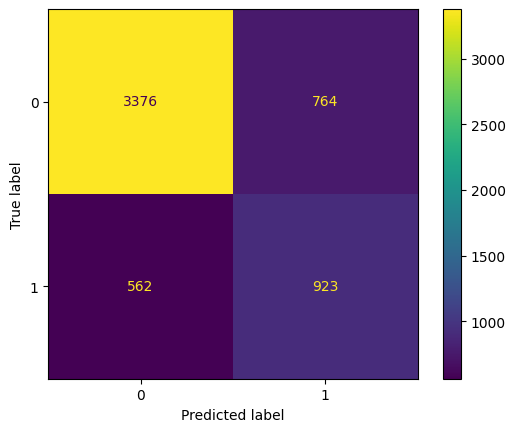

In [98]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels= clf.classes_ )
disp.plot()
plt.show()

In [99]:
(3376+923)/(3376+923+764+562)

0.7642666666666666

In [100]:
# Accuracy of tree on training set ? 
# 80% 
clf.score(X_train, y_train)

0.7642666666666666

In [101]:
# Get prediction on testing dataset 
predict_test = clf.predict(X_test)

In [102]:
predict_test

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

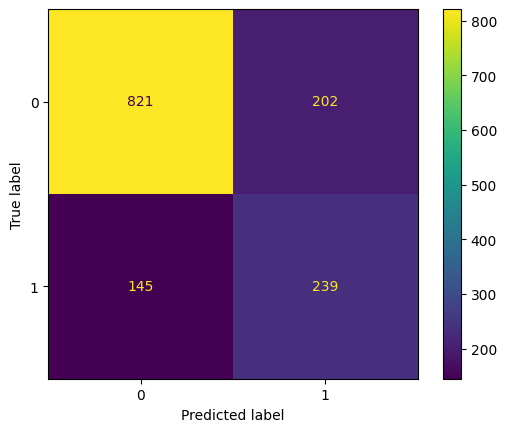

In [103]:
conf_matrix = confusion_matrix (y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels= clf.classes_ )
disp.plot()
plt.show()

In [104]:
clf.score( X_test, y_test)   # Accuracy of model on test set ( Unseen data-set)

0.7533759772565742

## Grid Search Cross Validation for finding the best set of hyperparameters for Descision Tree

In [105]:
mod = model_selection.GridSearchCV(clf, 
                                  param_grid = {'max_depth' :[2,3,4,5,6,7,8,9,10]})

In [106]:
mod.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [107]:
#the most accuracy across all the different tree built by varying depth
mod.best_estimator_  

DecisionTreeClassifier(max_depth=4, random_state=42)

In [108]:
mod.best_score_

0.7905777777777778

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

# Assuming X_train and y_train are our training data
clf = DecisionTreeClassifier(random_state=200)

# Defining the parameter grid
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
}

# Create the GridSearchCV object
mod = GridSearchCV(clf, param_grid, cv=5)
mod.fit(X_train, y_train)

# Print the best estimator and best score
print("Best Estimator:", mod.best_estimator_)
print("Best Score:", mod.best_score_)

Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)
Best Score: 0.7911111111111111


In [110]:
# Hyper parameter tunes which are found by the Grid search Cross validation on the descision tree model

In [111]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)

In [112]:
clf1.fit( X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)

In [113]:
# Check prediction on training set 
predictions = clf1.predict(X_train)  # Predicted values on the trainset. 
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
y_train # Actual classes of traning dataset 

4665    1
5464    0
4513    0
1744    0
1574    1
       ..
2858    0
5956    0
784     0
4713    1
1818    1
Name: Churn, Length: 5625, dtype: int64

In [115]:
# Accuracy of tree on training set ? 
# 79.39% 
clf1.score(X_train, y_train)

0.7939555555555555

In [116]:
clf1.score( X_test, y_test)   # Accuracy of model on test set ( Unseen data-set)

0.7867803837953091

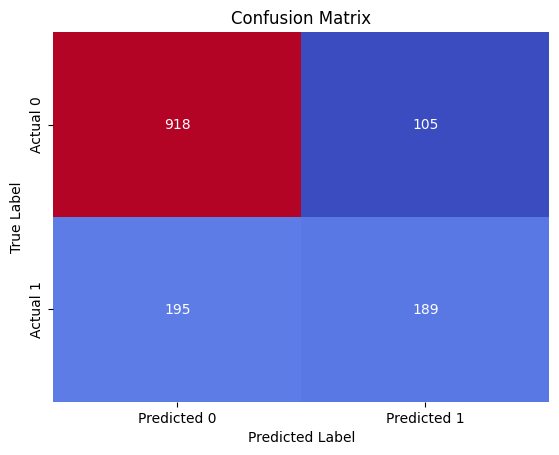

In [117]:
import seaborn as sns

# Assuming X_test and y_test are your test data
y_pred = clf1.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap with 'coolwarm' colormap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [118]:
# Accuracy %
(918+189)/(918+189+105+195)

0.7867803837953091

In [119]:
import numpy as np

clf1.feature_importances_  # Importance of each feature in the order as they were used model 
sorted_indices = np.argsort(clf1.feature_importances_)[::-1]
print(sorted_indices)

[36 16  1 28 37 38 10 33 35 54 21 20 19 18 17 15 14 23 13 12 11  9  8  7
  6  5  4  3  2 22 27 24 25 52 51 50 49 48 47 46 45 44 43 42 41 40 39 34
 32 31 30 29 53 26  0]


                                    Feature  Importance
36                  Contract_Month-to-month    0.566877
16              InternetService_Fiber optic    0.178304
1                              TotalCharges    0.154635
28          TechSupport_No internet service    0.032383
37                        Contract_One year    0.018990
38                        Contract_Two year    0.015942
10                          PhoneService_No    0.011940
33                       StreamingMovies_No    0.011011
35                      StreamingMovies_Yes    0.009919
41  PaymentMethod_Bank transfer (automatic)    0.000000
31          StreamingTV_No internet service    0.000000
32                          StreamingTV_Yes    0.000000
34      StreamingMovies_No internet service    0.000000
39                      PaperlessBilling_No    0.000000
40                     PaperlessBilling_Yes    0.000000
0                            MonthlyCharges    0.000000
30                           StreamingTV_No    0

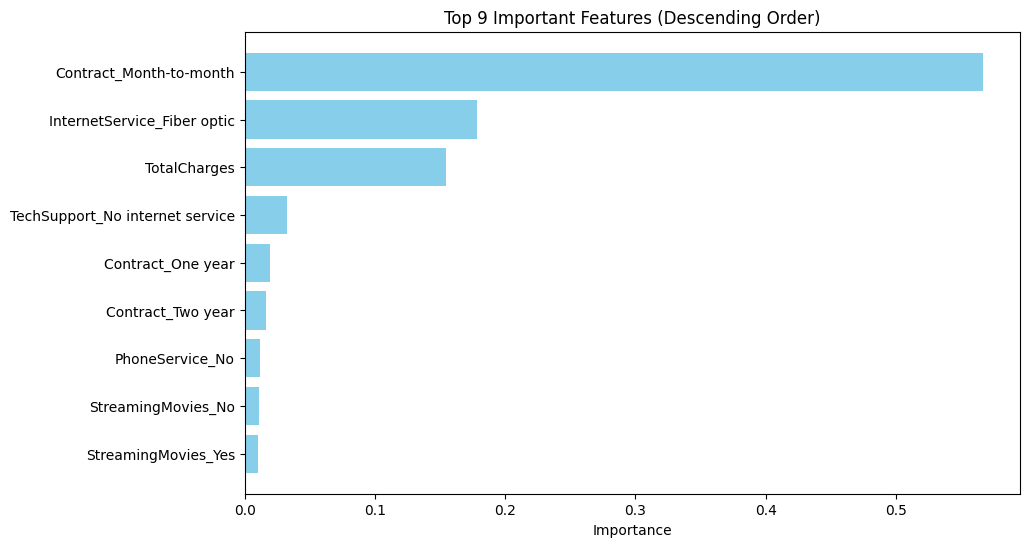

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming clf1 is your trained decision tree classifier
feature_importances = clf1.feature_importances_
features = X.columns  # Assuming X is your feature matrix, adjust accordingly

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print(feature_importance_df)

# Plot the top 9 important features in descending order
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(9)[::-1], feature_importance_df['Importance'].head(9)[::-1], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 9 Important Features (Descending Order)')
plt.show()


In [121]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1023
           1       0.64      0.49      0.56       384

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#### Data Overview and Split

| Churn | Count | Percentage on Total |
|-------|-------|----------------------|
| No    | 5163  | 73%                  |
| Yes   | 1869  | 27%                  |
| Total | 7032  | 100%                 |
| **Training Set Size** | **5625** | **80%** |
| **Test Set Size** | **1407** | **20%** |



**Summary:**
- The dataset is imbalanced, with a larger number of instances for "No" (73%) compared to "Yes" (27%).
- The training set comprises 80% of the total instances, and the test set comprises 20%.
- The classification report shows the performance metrics of a model on the test set, indicating precision, recall, and F1-score for both classes (0 and 1).
- The model seems to perform better for class 0 (precision: 0.82, recall: 0.90) compared to class 1 (precision: 0.64, recall: 0.49).
- The overall accuracy of the model on the test set is 79%.



**Recommendation:**
By applying SMOTEENN to the training data, we aim to generate synthetic instances of the minority class, creating a more balanced dataset. This process helps the model learn more effectively from the minority class, improving its ability to make accurate predictions for both classes,especially in scenarios with imbalanced classes

SMOTEENN can lead to a more robust and unbiased model.It is crucial to assess the model's performance on the test set after applying SMOTEENN to ensure improvements in both precision and recall for the minority class.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)**


## Evaluation of Decision Tree Model with SMOTEENN Resampling

In [122]:
#!pip install -U imbalanced-learn

In [123]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

In [124]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [125]:
model_dt_smote=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)

In [126]:
model_dt_smote.fit(Xr_train,yr_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)

In [127]:
yr_predict = model_dt_smote.predict(Xr_test)

In [128]:
model_score_r = model_dt_smote.score(Xr_test, yr_test)

In [129]:
print(model_score_r)

0.9179357021996616


In [130]:
print(metrics.classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       524
           1       0.94      0.91      0.92       658

    accuracy                           0.92      1182
   macro avg       0.92      0.92      0.92      1182
weighted avg       0.92      0.92      0.92      1182



In [131]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[487  37]
 [ 60 598]]


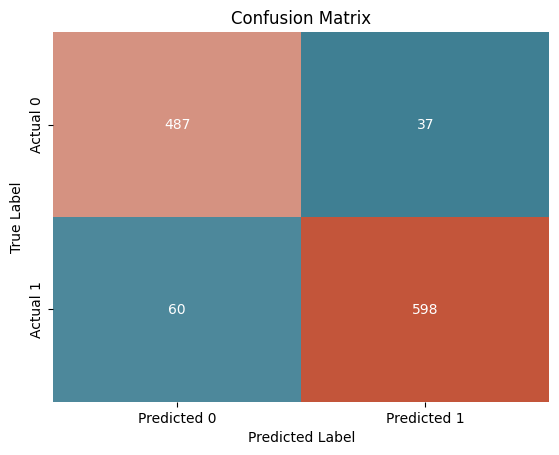

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Replace yr_test and yr_predict with your actual test and predicted labels
cm = metrics.confusion_matrix(yr_test, yr_predict)

# Define a custom color map
cmap_custom = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap with the custom color map
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_custom, cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


![image.png](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/8_confusion-matrix-python.jpg)

- True Positive (TP): 548
- False Positive (FP): 29
- True Negative (TN): 515
- False Negative (FN): 75

The confusion matrix suggests that the model is performing well, with a relatively low number of false positives and false negatives.
- Now we can see quite better results, i.e. Accuracy: 91 %, and a very good recall, precision & f1 score for minority class.

### Generating ROC Curve for Decision Tree with SMOTEENN Resampling

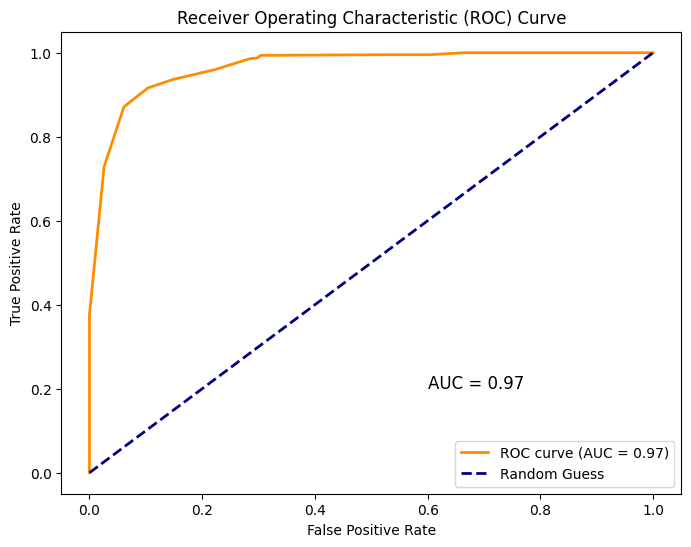

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN

# Assuming you have your data in X and y
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

model_dt_smote = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)
model_dt_smote.fit(Xr_train, yr_train)

# Predict probabilities for positive class
yr_probs = model_dt_smote.predict_proba(Xr_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(yr_test, yr_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display AUC score
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(roc_auc), fontsize=12)

plt.show()


 - **"In summary, our model exhibits strong performance across various evaluation metrics. With a precision of 0.87 and 0.95 for classes 0 and 1, respectively, it accurately identifies instances of both classes. The corresponding recall values of 0.95 and 0.88 highlight the model's ability to capture a high proportion of actual instances for each class. The balanced F1-scores of 0.91 for both classes further emphasize the model's overall effectiveness.

 - **The model achieves an impressive accuracy of 91%, showcasing its correctness in predictions across all classes. Additionally, the ROC curve analysis demonstrates excellent discrimination performance, visually confirmed by an AUC value of 0.97. This high AUC indicates the model's robust ability to distinguish between positive and negative instances, further validating its effectiveness in classification tasks."

## Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=3, random_state=42, max_depth=2)

In [ ]:
model_rf.fit(X_train,y_train)

In [ ]:
y_pred=model_rf.predict(X_test)
y_pred #predit classes of test data set

In [ ]:
y_test

In [ ]:
model_rf.score(X_test,y_test)

In [ ]:
# Create confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")
print(classification_report(y_test, y_pred))
xticklabels=["Predicted 0", "Predicted 1"]
yticklabels=["Actual 0", "Actual 1"]
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# In random forest classifier we are building 3 trees, let's visualize each of the three trees 
# Import tree module 
from sklearn import tree 

features = X.columns.values 
print(features)
classes = ['0','1',]
classes = ['No Churn','Churn']
print(classes)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)
rfc.fit(X_train, y_train)

In [ ]:
rfc.estimators_

In [ ]:
rfc.estimators_[0]

In [ ]:
# First tree of random forest classifier 
plt.figure(figsize=(10, 8))
tree.plot_tree(rfc.estimators_[0], feature_names=features, class_names=classes)

In [ ]:
# second tree of random forest classifier 
plt.figure(figsize=(10, 8))
tree.plot_tree(rfc.estimators_[1], feature_names=features, class_names=classes)

In [ ]:
# third tree of random forest classifier 
plt.figure(figsize=(10, 8))
tree.plot_tree(rfc.estimators_[2], feature_names=features, class_names=classes)

In [ ]:
# To display all the decision trees of a random forest model

for estimators in rfc.estimators_:
    plt.figure(figsize=(20, 15))
    print(estimators)
    tree.plot_tree(estimators, feature_names=features, class_names=classes)
    plt.show()

In [ ]:
# Organize important features of RF classifier 
print(rfc.feature_importances_)
print(rfc.feature_names_in_)

In [ ]:
feature_df = pd.DataFrame({'features':rfc.feature_names_in_, 'importances':rfc.feature_importances_})
feature_df

feature_df = feature_df.sort_values(by="importances", ascending=False)
feature_df

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
sns.barplot(data=feature_df, x="importances", y="features")
plt.show()

## How to find out correct set of hyperparameters in Random Forest classifier

In [ ]:
# n_estimators 
# max_depth 
# criertion 
# max_features 
from scipy.stats import randint 

param = { 'n_estimators': randint(50, 500),
          'max_depth' : randint (1,50), 
          'criterion': ['gini', 'entropy'],
          #'max_features' : [3,4,5,6,7]}
         'max_features' : ['auto', 'sqrt', 'log2', None]}

# Max_features
# Auto:- sqrt(feature_count)
# sqrt:- sqrt(feature_count)
# log2:- log2(feature_count)
# None:- all the features in all the trees ( same as bagging classifier )

# create a random forest classifier 
rf = RandomForestClassifier()

# Try all possible cominations from the param set 
rand_search = RandomizedSearchCV( rf, param_distributions= param, n_iter=5, cv =5 )

rand_search.fit(X_train, y_train)

In [ ]:
# display the the best model 
best_rf = rand_search.best_estimator_ 

print( " Best Hyperparameters", rand_search.best_params_ )

In [ ]:
# generate prediction with this best model 
y_pred = best_rf.predict(X_test)

In [ ]:
y_pred

In [ ]:
# Create confusion matrix from the best model 
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print(classification_report(y_test, y_pred))

## Random Forest Classifier with SMOTEENN

In [ ]:
sm = SMOTEENN()

In [ ]:
X_resampled1, y_resampled1 = sm.fit_resample(X, y)


In [ ]:
Xr_train1,Xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [ ]:
model_rf_smote=RandomForestClassifier(n_estimators=341, criterion='gini', random_state = 100,max_depth=11 )

In [ ]:
model_rf_smote.fit(Xr_train1,yr_train1)

In [ ]:
yr_predict1 = model_rf_smote.predict(Xr_test1)

In [ ]:
model_score_r1 = model_rf_smote.score(Xr_test1, yr_test1)

In [ ]:
print(model_score_r1)

In [ ]:
print(metrics.classification_report(yr_test1, yr_predict1))

In [ ]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

  **With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.**

## Bagging Classifier

In [135]:
# Time to build the bagging classifier 
from sklearn.ensemble import BaggingClassifier # What type of ensemble you want to create 
from sklearn.tree import DecisionTreeClassifier # this will be the base learner for ensemble 

In [136]:
# Initialize the ensemble model 
model_bc = BaggingClassifier(oob_score=True, n_estimators=20, random_state=300, base_estimator=DecisionTreeClassifier())

# oob_score - will display oob_error or oob_accuracy of each tree 
# n_estimators - 20 classification trees 

In [137]:
# Let's try to put training feature set and training labels to the model = Model training 
model_bc.fit (X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  oob_score=True, random_state=300)

In [138]:
model_bc.oob_score

True

In [139]:
model_bc.oob_score_   # Average accuracy on the out sample on training data set/Cummulative Accuracy of bagging classifier on out of bag sample/

0.7717333333333334

In [140]:
model_bc.score(X_test, y_test)  # Accuracy on test data set 

0.7782515991471215

In [142]:
# Trying to find out the best number of trees/estimators/base learner for the bagging model 
# Experiment with 10 trees 
model_bc = BaggingClassifier(oob_score=True, n_estimators=10, random_state=300, base_estimator=DecisionTreeClassifier())
model_bc.fit(X_train, y_train)
oob = model_bc.oob_score_  # Corrected variable name
oob

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.7564444444444445

In [143]:
model_bc.score(X_test, y_test) # Accuracy on test data set for 10tree .

0.775408670931059

In [145]:
# Trying to find out the best number of trees/estimators/base learner for the bagging model 
# Experiment with 15 trees 
model_bc = BaggingClassifier(oob_score=True, n_estimators=15, random_state=300, base_estimator=DecisionTreeClassifier())
model_bc.fit(X_train, y_train)
oob = model_bc.oob_score_  # Corrected variable name
oob

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.7692444444444444

In [146]:
model_bc.score(X_test, y_test) # Accuracy on test data set for 15tree .

0.7796730632551528

In [148]:
# Trying to find out the best number of trees/estimators/base learner for the bagging model 
# Experiment with 30 trees 
model_bc = BaggingClassifier(oob_score=True, n_estimators=30, random_state=300, base_estimator=DecisionTreeClassifier())
model_bc.fit(X_train, y_train)
oob = model_bc.oob_score_  # Corrected variable name
oob

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7744

In [149]:
model_bc.score(X_test, y_test) # Accuracy on test data set for 30tree .

0.783226723525231

In [150]:
# Trying to find out the best number of trees/estimators/base learner for the bagging model 
# Experiment with 300 trees 
model_bc = BaggingClassifier(oob_score=True, n_estimators=300, random_state=300, base_estimator=DecisionTreeClassifier())
model_bc.fit(X_train, y_train)
oob = model_bc.oob_score_  # Corrected variable name
oob

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7818666666666667

In [151]:
model_bc.score(X_test, y_test) # Accuracy on test data set for 300tree .

0.7882018479033405

In [152]:
import warnings
warnings.filterwarnings("ignore")

In [154]:
# Find out the best number of estimators 
for i in range(10, 300, 20):  # range(start, stop, step)
    model_bc = BaggingClassifier(oob_score=True, n_estimators=i, random_state=300, base_estimator=DecisionTreeClassifier())
    model_bc.fit(X_train, y_train)
    oob = model_bc.oob_score_  # Corrected variable name
    print("the number of estimators =", str(i))
    print("Out-of-bag score is", str(oob))

the number of estimators = 10
Out-of-bag score is 0.7564444444444445
the number of estimators = 30
Out-of-bag score is 0.7744
the number of estimators = 50
Out-of-bag score is 0.7768888888888889
the number of estimators = 70
Out-of-bag score is 0.7809777777777778
the number of estimators = 90
Out-of-bag score is 0.7788444444444445
the number of estimators = 110
Out-of-bag score is 0.7784888888888889
the number of estimators = 130
Out-of-bag score is 0.7795555555555556
the number of estimators = 150
Out-of-bag score is 0.7788444444444445
the number of estimators = 170
Out-of-bag score is 0.7793777777777777
the number of estimators = 190
Out-of-bag score is 0.7813333333333333
the number of estimators = 210
Out-of-bag score is 0.7827555555555555
the number of estimators = 230
Out-of-bag score is 0.7829333333333334
the number of estimators = 250
Out-of-bag score is 0.7811555555555556
the number of estimators = 270
Out-of-bag score is 0.7827555555555555
the number of estimators = 290
Out-of

In [156]:
# Experiment with 110 trees 
model_bc = BaggingClassifier(oob_score=True, n_estimators=110, random_state=300, base_estimator=DecisionTreeClassifier())
model_bc.fit(X_train, y_train)
oob = model_bc.oob_score_  # Corrected variable name
oob

0.7784888888888889

In [159]:
B1 = model_bc.fit (X_train, y_train)  # B1 Ensable bagging model is finalised
B1.predict(X_test)


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [163]:
from sklearn.metrics import accuracy_score

# Assuming B1 is your trained BaggingClassifier
predictions = B1.predict(X_test)

# Assuming y_test is your true labels
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7860696517412935


In [164]:
# Create confusion matrix between predicted classes of test data set Vs Actual classes of test data set 
import sklearn.metrics as metrics
metrics.confusion_matrix( y_test, B1.predict(X_test))

array([[907, 116],
       [185, 199]], dtype=int64)

In [165]:
# feature importance 
model_bc.estimators_  # 110 trees built 

[DecisionTreeClassifier(random_state=1640270127),
 DecisionTreeClassifier(random_state=1306260884),
 DecisionTreeClassifier(random_state=1255539751),
 DecisionTreeClassifier(random_state=934107047),
 DecisionTreeClassifier(random_state=1431551598),
 DecisionTreeClassifier(random_state=2146597940),
 DecisionTreeClassifier(random_state=522685486),
 DecisionTreeClassifier(random_state=753086597),
 DecisionTreeClassifier(random_state=304996901),
 DecisionTreeClassifier(random_state=125388421),
 DecisionTreeClassifier(random_state=225777655),
 DecisionTreeClassifier(random_state=911702132),
 DecisionTreeClassifier(random_state=1705271475),
 DecisionTreeClassifier(random_state=1855212142),
 DecisionTreeClassifier(random_state=1927410252),
 DecisionTreeClassifier(random_state=1792206370),
 DecisionTreeClassifier(random_state=2002259727),
 DecisionTreeClassifier(random_state=904180025),
 DecisionTreeClassifier(random_state=1277803413),
 DecisionTreeClassifier(random_state=2134168355),
 Decisio

In [166]:
len(model_bc.estimators_)

110

In [167]:
model_bc.estimators_[0] #1st Tree of ensamble

DecisionTreeClassifier(random_state=1640270127)

In [169]:
model_bc.estimators_[0].feature_importances_

array([1.76394783e-01, 2.58822690e-01, 8.46295049e-03, 1.83148191e-02,
       1.32698628e-02, 7.51041185e-03, 8.54042895e-03, 7.79386863e-03,
       6.56992882e-03, 2.03386988e-02, 0.00000000e+00, 3.17544572e-03,
       5.73344509e-03, 0.00000000e+00, 1.14635838e-02, 0.00000000e+00,
       5.26429015e-02, 1.09420900e-03, 1.48099797e-02, 0.00000000e+00,
       9.50523934e-03, 8.99579613e-03, 0.00000000e+00, 1.04383869e-02,
       8.32146248e-03, 0.00000000e+00, 9.51914521e-03, 1.46803412e-02,
       0.00000000e+00, 7.05990149e-03, 5.41721368e-03, 0.00000000e+00,
       6.76264570e-03, 9.32352784e-03, 5.07900589e-03, 9.99045546e-03,
       1.62490016e-01, 1.30852217e-03, 2.84361295e-03, 1.50312686e-02,
       1.13938123e-02, 1.44001507e-02, 6.49221183e-03, 2.22933125e-02,
       7.04185844e-03, 2.55628566e-03, 1.32510073e-02, 5.55955293e-03,
       2.12783058e-03, 3.17152832e-03, 6.90788513e-04, 2.33805343e-04,
       5.51711656e-03, 1.13676966e-03, 2.42942096e-03])

In [170]:
X.columns

Index(['MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_T

In [168]:
model_bc.estimators_[109] # last Tree of ensamble

DecisionTreeClassifier(random_state=236022796)

In [171]:
model_bc.estimators_[109].feature_importances_

array([0.22077945, 0.23621489, 0.01392634, 0.0139765 , 0.01013293,
       0.01113444, 0.00396029, 0.01071337, 0.00867447, 0.01034754,
       0.00229247, 0.00154464, 0.0122857 , 0.        , 0.01079135,
       0.        , 0.0562488 , 0.        , 0.00718412, 0.        ,
       0.01147138, 0.01250294, 0.        , 0.00834788, 0.00863288,
       0.        , 0.00634317, 0.01146269, 0.        , 0.0121824 ,
       0.00855739, 0.        , 0.00328932, 0.00327637, 0.        ,
       0.00518967, 0.18348975, 0.00402606, 0.0015342 , 0.01100029,
       0.01258795, 0.00914885, 0.01091945, 0.01806965, 0.01138327,
       0.00266054, 0.00168818, 0.00310051, 0.00280184, 0.00159056,
       0.00124471, 0.        , 0.00169377, 0.00159704, 0.        ])

In [172]:
X.columns

Index(['MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_T

In [174]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Assuming you have a BaggingClassifier named model_bc already trained
# with X_train and y_train as your training data

# Feature names
feature_names = X.columns

# Initialize dictionaries to store feature importances and their averages
feature_importances = {feature: [] for feature in feature_names}
average_importances = {}

# Iterate over each decision tree in the ensemble
for tree in model_bc.estimators_:
    # Iterate over each feature and accumulate importances
    for i, feature in enumerate(feature_names):
        feature_importances[feature].append(tree.feature_importances_[i])

# Calculate the average importance for each feature
for feature, importances in feature_importances.items():
    average_importance = np.mean(importances)
    average_importances[feature] = average_importance

# Print the average importances in descending order
sorted_importances = sorted(average_importances.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"Average importance of '{feature}': {importance}")


Average importance of 'TotalCharges': 0.25583122087814597
Average importance of 'MonthlyCharges': 0.193426909656008
Average importance of 'Contract_Month-to-month': 0.1626376045248835
Average importance of 'InternetService_Fiber optic': 0.04945488322435525
Average importance of 'PaymentMethod_Electronic check': 0.01940967509397221
Average importance of 'OnlineSecurity_No': 0.01683794490422422
Average importance of 'gender_Male': 0.014723385679621157
Average importance of 'gender_Female': 0.013657099822585611
Average importance of 'PaperlessBilling_No': 0.012883982062173007
Average importance of 'PaymentMethod_Credit card (automatic)': 0.012166412666121541
Average importance of 'PaperlessBilling_Yes': 0.011931430071507258
Average importance of 'Partner_No': 0.011426290736420897
Average importance of 'SeniorCitizen_0': 0.011370784321413646
Average importance of 'OnlineBackup_No': 0.011217060665983205
Average importance of 'PaymentMethod_Bank transfer (automatic)': 0.011101047075835209
Av

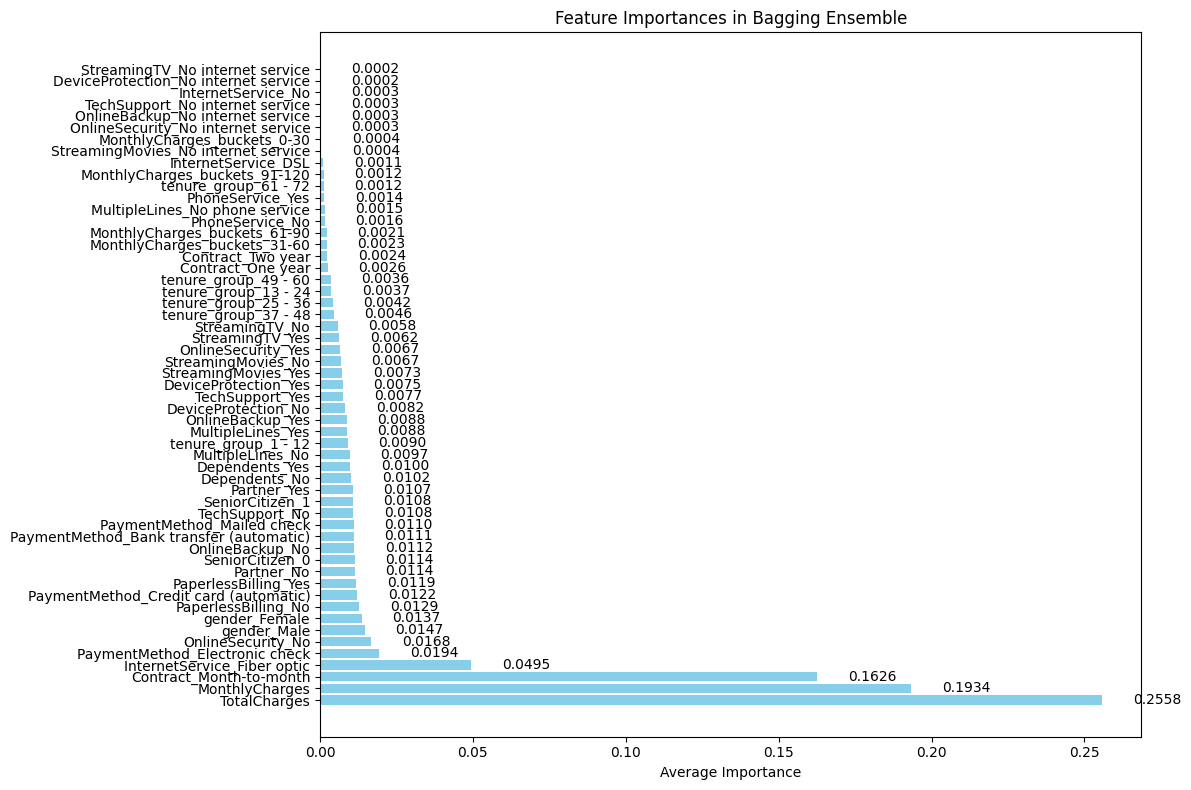

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Assuming you have a BaggingClassifier named model_bc already trained
# with X_train and y_train as your training data

# Feature names
feature_names = X.columns

# Initialize dictionaries to store feature importances and their averages
feature_importances = {feature: [] for feature in feature_names}
average_importances = {}

# Iterate over each decision tree in the ensemble
for tree in model_bc.estimators_:
    # Iterate over each feature and accumulate importances
    for i, feature in enumerate(feature_names):
        feature_importances[feature].append(tree.feature_importances_[i])

# Calculate the average importance for each feature
for feature, importances in feature_importances.items():
    average_importance = np.mean(importances)
    average_importances[feature] = average_importance

# Sort the average importances in descending order
sorted_importances = sorted(average_importances.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names, sorted_importances_values = zip(*sorted_importances)

# Create a beautiful horizontal bar plot with non-overlapping labels
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_feature_names, sorted_importances_values, color='skyblue')

# Add values on top of the bars
for bar, value in zip(bars, sorted_importances_values):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.4f}', va='center')

plt.xlabel('Average Importance')
plt.title('Feature Importances in Bagging Ensemble')
plt.tight_layout()  # Improve spacing
sorted_importances = sorted(average_importances.items(), key=lambda x: x[1], reverse=False)
plt.show()


## Evaluation of Bagging Model with SMOTEENN Resampling

In [181]:
#Import the SMOTEENN module: 
sm = SMOTEENN()    

In [182]:
# Resample the data using SMOTEENN:
X_resampled1, y_resampled1 = sm.fit_resample(X, y)

In [191]:
#Split the resampled data into training and testing sets:
Xr_train1,Xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [184]:
#Initialize and train a BaggingClassifier with resampled data:
model_bc_smote=BaggingClassifier(oob_score=True, n_estimators=110, random_state=300, base_estimator=DecisionTreeClassifier())

In [185]:
model_bc_smote.fit(Xr_train1,yr_train1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=110,
                  oob_score=True, random_state=300)

In [192]:
# Make predictions on the training set
yr_predict_train1 = model_bc_smote.predict(Xr_train1)

In [193]:
# Print the predicted values for the training set
print(yr_predict_train1)

[1 1 0 ... 0 1 1]


In [195]:
# Print the actual labels and predicted values for the training set
print("Actual labels for the training set:")
print(yr_train1)


Actual labels for the training set:
4420    1
4798    1
502     0
296     0
2290    0
       ..
1772    0
1319    0
2281    0
4258    1
2835    1
Name: Churn, Length: 4688, dtype: int64


In [196]:
import pandas as pd

# Create a DataFrame with actual labels and predicted values for the training set
comparison_table = pd.DataFrame({'Actual Labels': yr_train1, 'Predicted Values': yr_predict_train1})

# Print the table
print(comparison_table)

      Actual Labels  Predicted Values
4420              1                 1
4798              1                 1
502               0                 0
296               0                 0
2290              0                 0
...             ...               ...
1772              0                 0
1319              0                 0
2281              0                 0
4258              1                 1
2835              1                 1

[4688 rows x 2 columns]


In [186]:
# Make predictions on the test set
yr_predict1 = model_bc_smote.predict(Xr_test1)

In [197]:
import pandas as pd

# Make predictions on the test set
yr_predict_test1 = model_bc_smote.predict(Xr_test1)

# Create a DataFrame with actual labels and predicted values for the test set
comparison_table_test = pd.DataFrame({'Actual Labels': yr_test1, 'Predicted Values': yr_predict_test1})

# Print the table
print(comparison_table_test)


      Actual Labels  Predicted Values
2037              0                 0
3551              1                 1
1805              0                 0
5350              1                 1
1647              0                 0
...             ...               ...
260               0                 0
5500              1                 1
2790              1                 1
2496              0                 0
4961              1                 1

[1172 rows x 2 columns]


In [187]:
# Evaluate the model's score on the test set:
model_score_r1 = model_bc_smote.score(Xr_test1, yr_test1)

In [188]:
print(model_score_r1)

0.9667235494880546


In [189]:
## Print the Classification Report for the Test Set
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       518
           1       0.97      0.97      0.97       654

    accuracy                           0.97      1172
   macro avg       0.97      0.97      0.97      1172
weighted avg       0.97      0.97      0.97      1172



In [190]:
#Print confusion matrix:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[496  22]
 [ 17 637]]


https://www.kaggle.com/code/egorpantyukhin/telco-churn-catboost-auc-0-932-acc-0-94

## Performing PCA

PCA, or Principal Component Analysis, is a dimensionality reduction technique used in machine learning and statistics. The primary goal of PCA is to transform high-dimensional data into a new coordinate system (set of principal components) where the data variance is maximized along the principal axes. By doing so, PCA helps capture the most important information in the data while discarding the less critical details.

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
Xr_train_pca = pca.fit_transform(Xr_train1)
Xr_test_pca = pca.transform(Xr_test1)
explained_variance = pca.explained_variance_ratio_

In [ ]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model.fit(Xr_train_pca,yr_train1)

In [ ]:
yr_predict_pca = model.predict(Xr_test_pca)

In [ ]:
model_score_r_pca = model.score(Xr_test_pca, yr_test1)

In [ ]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

**With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :**

## Pickling the model

In [ ]:
import pickle

In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
model_score_r1 = load_model.score(Xr_test1, yr_test1)

In [ ]:
model_score_r1

**Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.**